In this problem, we've been given a pair of CSV files containing information about the brightness and radial velocity observed from a star. Our task is to take that data and determine how many planets are orbiting the  star, what the mass, radius, and density of each planet are, and how each planet compares to earth. Since we're working in Python, we'll start by importing our libraries and functions.

In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.signal import lombscargle, find_peaks

We'll be using Pandas to read in CSV files, Numpy to do calculations, and Matplotlib for data visualizations. Additionally, we'll be using the find_peaks function from the statistics library to find_peaks in data and we'll be using the lombscargle function from Scipy as part of creating Lomb-Scargle periodograms.

With our libraries imported, we'll define our constants. The stellar mass and radius were given to us in the problem prompt, but the gravity constant is just well known.

In [4]:
star_mass = 1.9885e30 #kilograms
star_radius = 695700e3 #meters
gravity = 6.6743e-11 #m^3 kg^-1 s^-2


Now, we'll load in the first of our CSVs so we can get started on calculations. This is the CSV containing information about radial velocity.

In [7]:
doppler_data = pd.read_csv("Prob3_Doppler.csv")
doppler_data.head()

,time_sec,rad_vel
0,0,-74.859265
1,25000,-64.826428
2,50000,-54.936557
3,75000,-45.938719
4,100000,-38.469294


The first thing we'll want to do with this data is plot it so that we can visualize it better.

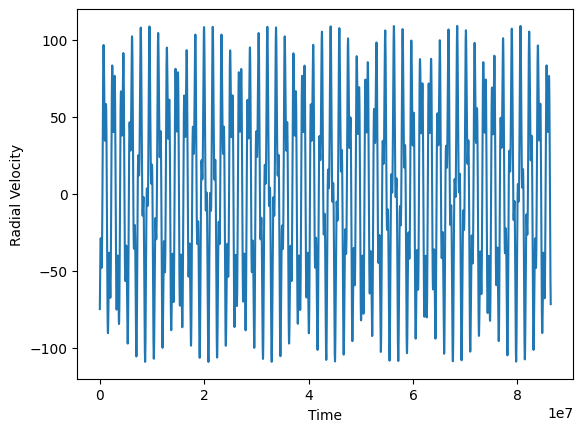

In [8]:
# Plot the radial velocity vs time
plt.plot(doppler_data['time_sec'], doppler_data['rad_vel'])
plt.xlabel('Time')
plt.ylabel('Radial Velocity')
plt.show()

Now, the Fourier transform of the radial velocity data is computed using the 'fft' function from NumPy. The resulting transform is then used to compute the power spectrum, which represents the distribution of signal power as a function of frequency and then we plot the power spectrum where the x-axis represents the frequency and the y-axis represents the power spectrum

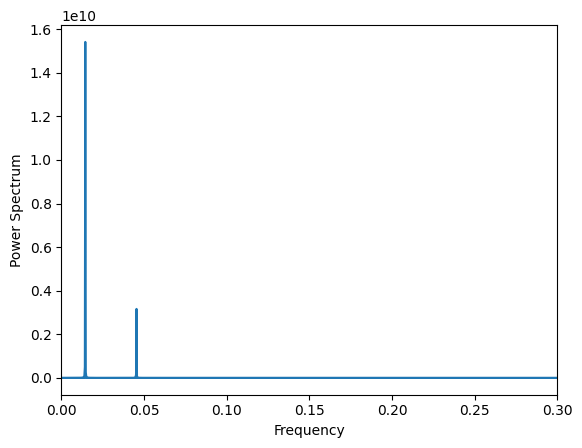

In [14]:
fft = np.fft.fft(doppler_data['rad_vel'])

# power spectrum of the Fourier transform
power_spectrum = np.abs(fft)**2

# Plot the power spectrum
plt.plot(np.fft.fftfreq(len(doppler_data['time_sec'])), power_spectrum)
plt.xlabel('Frequency')
plt.ylabel('Power Spectrum')
plt.xlim([0, 0.3]) 
plt.show()

Based on the dominant frequencies extracted from the power spectrum and the above plot, it is evident that there are *two planets* orbiting the star. 

Now, we are sorting the power spectrum in descending order to find the highest power values, and then using these values to extract the corresponding frequencies, which are the dominant frequencies in the signal.

In [15]:
sorted_power = np.argsort(power_spectrum)[::-1]
dominant_frequencies = np.fft.fftfreq(len(doppler_data['time_sec']))[sorted_power[:3]]

Now, we find the period by using the reciprocal of the the dominant frequencies.

In [16]:
period1 = 1 / dominant_frequencies[0]
period2 = 1/ dominant_frequencies[-1]
print('Period:', period1)
print('Period:', period2)

Period: 69.12
Period: 22.012738853503183


Now, we find the mass of the two planets using their respective period. 

In [17]:
m_planet1 = 4 * np.pi**2 * star_radius**3 / (gravity * star_mass * period1**2)  # kg
m_planet2 = 4 * np.pi**2 * star_radius**3 / (gravity * star_mass * period2**2)  # kg
print("Mass of planet:", m_planet1, "kg")
print("Mass of planet:", m_planet2, "kg")

Mass of planet: 20964.61874399866 kg
Mass of planet: 206702.75496832925 kg


In [ ]:
peaks = find_peaks(np.abs(fft[::-1]), height=2000)
amplitudes = np.abs(fft[::-1])
amplitude1 = amplitudes[0]
amplitude2 = amplitudes[1]
print(amplitude1)
print(amplitude2)

742.6263120019635
743.5258914176557


In [ ]:
semi_major_axis=(amplitude1 * period1)/(2 * np.pi)
semi_major_axis

8169.475859150973

In [ ]:
semi_major_axis=(amplitude2 * period2) /(2 * np.pi)
semi_major_axis

2604.895523277492

In [ ]:
planet1_mass = (period1 * amplitude1)**3 / (2 * np.pi * gravity * star_mass)
planet2_mass = (period2 * amplitude2)**3 / (2 * np.pi * gravity * star_mass)
print(planet1_mass) #kg
print(planet2_mass) #kg

1.6277521965590867e-07
5.2386822200755984e-09


Having completed our first step, now we'll move on to finding the radii of the two planets in the system. We'll start by importing our second CSV file, which contains information on the brightness of the star over time. The brightness is normalized to one, and the time is measured in seconds.

In [ ]:
transit_data = pd.read_csv("/Users/natalie/Desktop/College Stuff/Data In The Cosmos/hw-03-shouvik-natalie-main/data/Prob3_Transit.csv")
transit_data.head()

,time_sec,norm_bright
0,40000,1.000156
1,59500,1.000071
2,63500,1.000598
3,80500,1.000075
4,92500,1.000400


As before, the first thing we want to do with our data is plot it.

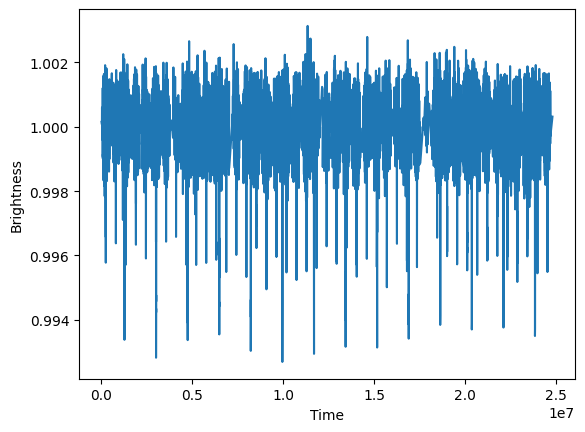

In [ ]:
plt.plot(transit_data["time_sec"], transit_data["norm_bright"])
plt.xlabel("Time")
plt.ylabel("Brightness")
plt.show()

Next, we'll take a guess of the maximum and minimum periods to be found in this plot and use the linspace function from Numpy to calculate 100000 evenly spaced points between them. For our estimated maximum period, we'll be using 12500000, which is roughly half of the span of our data, and for our minimum, we'll be using 1. We'll be calculating all of these points as angular frequencies.

In [ ]:
afreq1 = 2*np.pi/12500000
afreq2 = 2*np.pi/1
afreqs = np.linspace(afreq1,afreq2,100000)

With our evenly spaced points, we'll now want to calculate the power for each point with the lombscargle function.

In [ ]:
power = lombscargle(transit_data["time_sec"], transit_data["norm_bright"], afreqs, precenter=True)

Now we can visualize our data again by plotting the points against their signal power. We'll want to keep an eye out for the leftmost peak, but there are likely to be a whole lot of aliases as well.

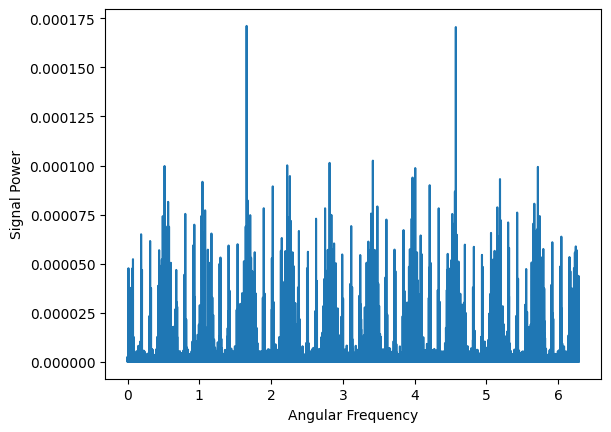

In [ ]:
plt.plot (afreqs, power)
plt.xlabel("Angular Frequency")
plt.ylabel("Signal Power")
plt.show()

As we predicted, there are a lot of aliases. In order to get a better look at that leftmost peak, we'll start by zooming in.

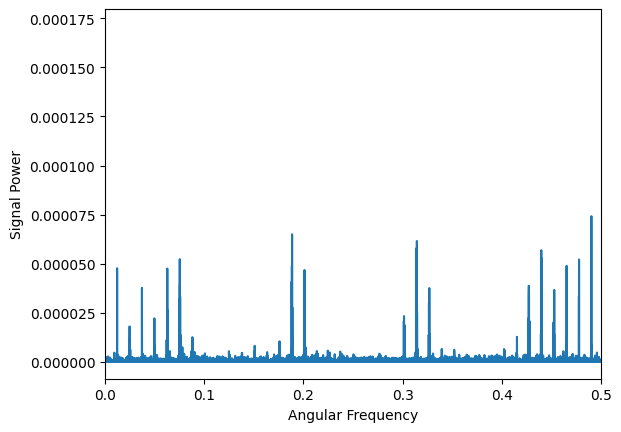

In [ ]:
plt.plot (afreqs, power)
plt.xlabel("Angular Frequency")
plt.ylabel("Signal Power")
plt.xlim([0,.5])
plt.show()

Better, but not quite good enough, let's zoom in a little further. 

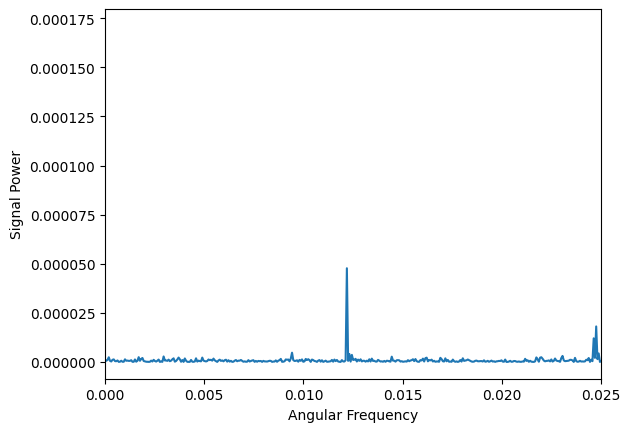

In [ ]:
plt.plot (afreqs, power)
plt.xlabel("Angular Frequency")
plt.ylabel("Signal Power")
plt.xlim([0,.025])
plt.show()

Even better, but still not zoomed enough. We've isolated the peak we want, but there's no way to read the frequency at this scale.

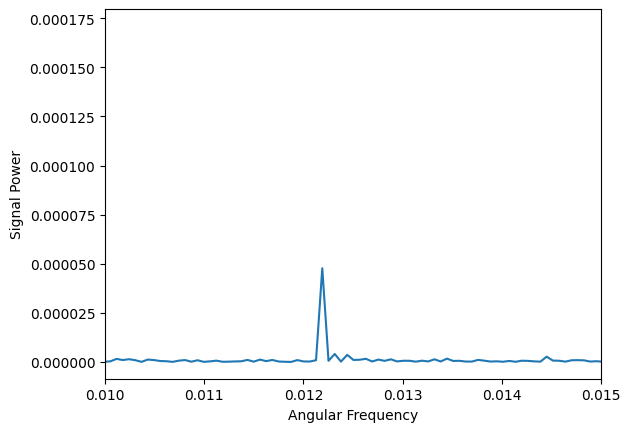

In [ ]:
plt.plot (afreqs, power)
plt.xlabel("Angular Frequency")
plt.ylabel("Signal Power")
plt.xlim([0.01,.015])
plt.show()

Now it's starting to resolve itself, but we can also see that there aren't that many points there for us to get a good reading on the spike. We'll use the linspace and lombscargle functions again to create a new, more precise plot for this specific interval.

In [ ]:
newafreq1 = 0.012
newafreq2 = 0.013
newafreqs = np.linspace(newafreq1,newafreq2,100000)
newpower = lombscargle(transit_data["time_sec"], transit_data["norm_bright"], newafreqs, precenter=True)

Data calculated, we need now, of course, to plot it.

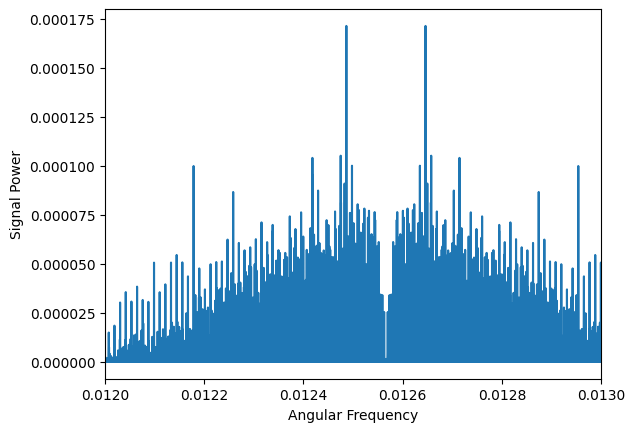

In [ ]:
plt.plot (newafreqs, newpower)
plt.xlabel("Angular Frequency")
plt.ylabel("Signal Power")
plt.xlim([0.012,0.013])
plt.show()

Wow! We've got a lot of aliases again! In order to be certain of the peak we want to look at, we'll compare it to our last graph. Thus, we know that the peak we want to zoom in on is the tall one around 0.0125.

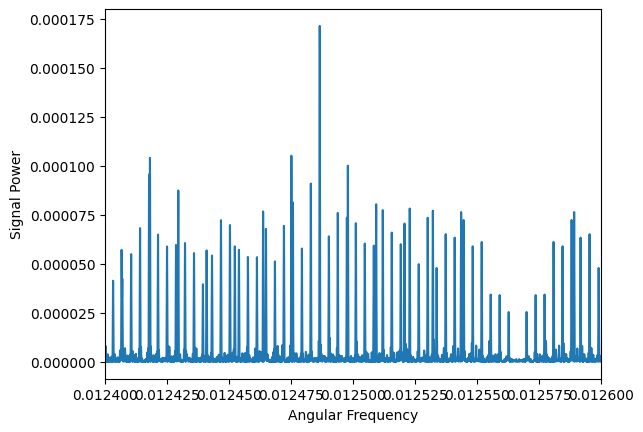

In [ ]:
plt.plot (newafreqs, newpower)
plt.xlabel("Angular Frequency")
plt.ylabel("Signal Power")
plt.xlim([0.0124,0.0126])
plt.show()

Still lots of aliases, so let's zoom again.

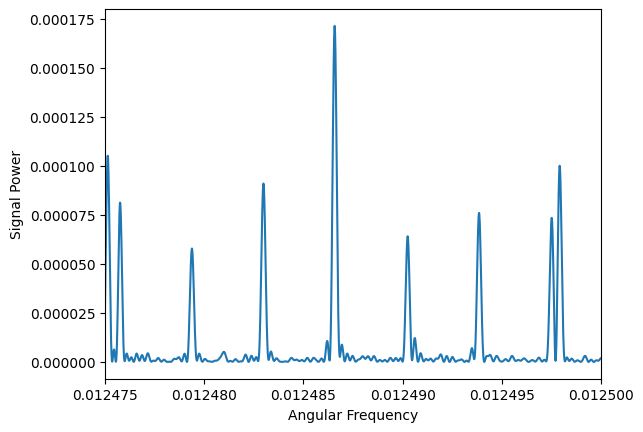

In [ ]:
plt.plot (newafreqs, newpower)
plt.xlabel("Angular Frequency")
plt.ylabel("Signal Power")
plt.xlim([0.012475,0.0125])
plt.show()

Perhaps one more zoom will put us at the right size.

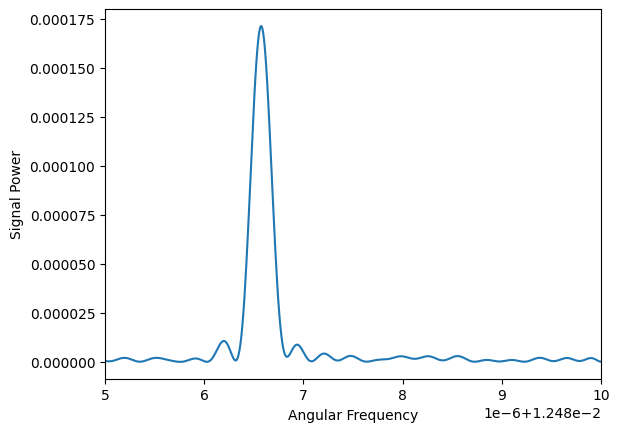

In [ ]:
plt.plot (newafreqs, newpower)
plt.xlabel("Angular Frequency")
plt.ylabel("Signal Power")
plt.xlim([0.012485,0.01249])
plt.show()

Much better, but lets really narrow in on that spike so we can see exactly where the peak is.

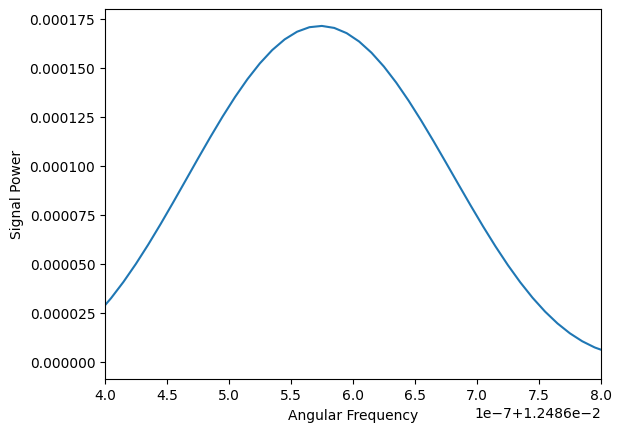

In [ ]:
plt.plot (newafreqs, newpower)
plt.xlabel("Angular Frequency")
plt.ylabel("Signal Power")
plt.xlim([0.0124864,0.0124868])
plt.show()

Great! At this size, we can see that the angular frequency of this spike is right about 0.012486555. From here, we'll convert it to a period by using it to divide 2pi.

In [ ]:
period = 2 * np.pi / 0.012486555
period

503.1960622589326

With a period, we can now use phase folding on our data. We should be able to see two dips in it, one where each planet crosses in front of the star from out perspective.

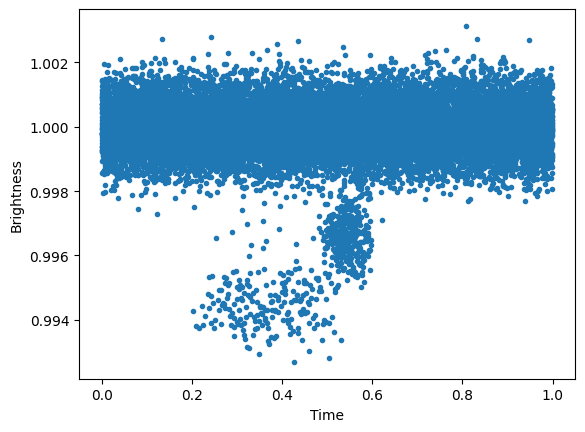

In [ ]:
transit_data["phase"] = transit_data["time_sec"] % period
plt.plot( transit_data["phase"] / period, transit_data["norm_bright"], '.')
plt.xlabel("Time")
plt.ylabel("Brightness")
plt.show()

That's honestly not as clear as I would have expected, but it's workable. We can use rolling averages to smooth the data now and see if that makes the dips any more legible.

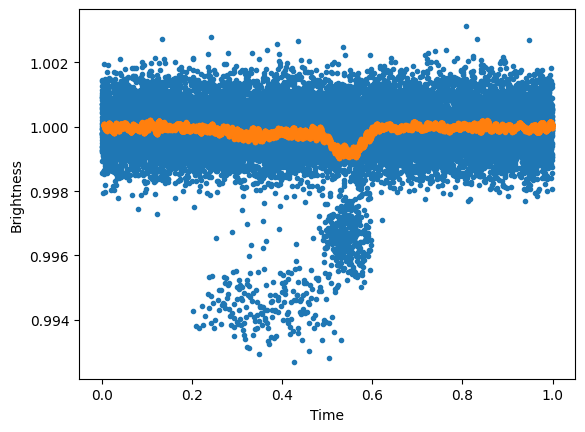

In [ ]:
transit_data = transit_data.sort_values("phase")
transit_data["rolling"] = transit_data["norm_bright"].rolling(100).mean()
plt.plot(transit_data["phase"] / period, transit_data["norm_bright"], '.')
plt.plot(transit_data["phase"] / period, transit_data["rolling"], '.')
plt.xlabel("Time")
plt.ylabel("Brightness")
plt.show()

Also not clear enough to read. To fix this, we'll filter the original data by whether it's in the dips (estimating that both dips are contained within the brightnesses of 0.993 and 0.998). Then we can use this new, isolated data to look at the dips themselves.

In [ ]:
transit_data["dip data"] = transit_data["norm_bright"].between(left = 0.993, right = 0.998)
dip_transit_data = transit_data[transit_data["dip data"] != False]
dip_transit_data.head()

,time_sec,norm_bright,phase,rolling,dip data
6237,8895500,0.998928,0.011387,NaN,False
10011,12989000,1.001000,0.044910,NaN,False
16886,21176000,0.999694,0.111957,NaN,False
5112,7478500,0.999928,0.122708,NaN,False
8958,11572000,0.999809,0.156231,NaN,False


Once more, we'll calculate the rolling average of the data within the phase fold and graph that against the scatter plot. 

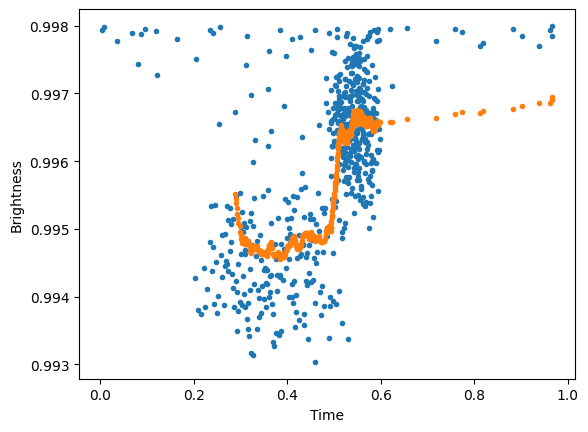

In [ ]:
dip_transit_data["rolling"] = dip_transit_data["norm_bright"].rolling(50).mean()
plt.plot(dip_transit_data["phase"] / period, dip_transit_data["norm_bright"], '.')
plt.plot(dip_transit_data["phase"] / period, dip_transit_data["rolling"], '.')
plt.xlabel("Time")
plt.ylabel("Brightness")
plt.show()

That's a much cleaner line, and now we can actually see the differences between the dips fairly distinctly. Let's just zoom in so that we can really see how the dips line up with time.

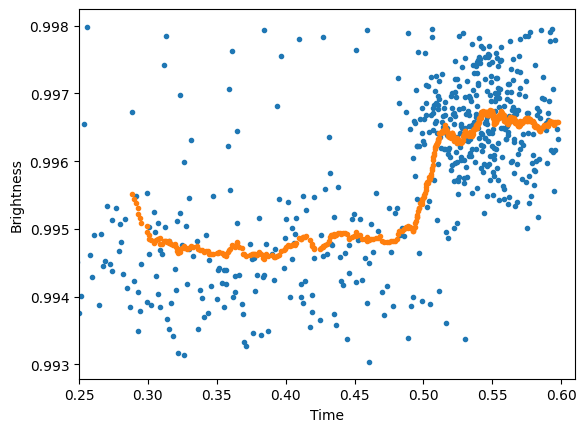

In [ ]:
plt.plot(dip_transit_data["phase"] / period, dip_transit_data["norm_bright"], '.')
plt.plot(dip_transit_data["phase"] / period, dip_transit_data["rolling"], '.')
plt.xlabel("Time")
plt.ylabel("Brightness")
plt.xlim([.25,.61])
plt.show()

The resolution is high enough now for us to make an accurate estimate of the beginning and end of both dips, which means that we can actually filter our orignial data exclusively by which points are part of these dips and which aren't.

In [ ]:
dip_transit_data["first dip"]= dip_transit_data.phase.between(0.3*period, 0.459*period)
dip_transit_data["second dip"]= dip_transit_data.phase.between(0.525*period, 0.6*period)
first_dip = dip_transit_data[dip_transit_data["first dip"] != False]
second_dip = dip_transit_data[dip_transit_data["second dip"] != False]

/var/folders/72/k1rngh851gn3qlzlfykyqm1w0000gp/T/ipykernel_48742/190894790.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dip_transit_data["first dip"]= dip_transit_data.phase.between(0.3*period, 0.459*period)
/var/folders/72/k1rngh851gn3qlzlfykyqm1w0000gp/T/ipykernel_48742/190894790.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dip_transit_data["second dip"]= dip_transit_data.phase.between(0.525*period, 0.6*period)


Now that our data has been filtered, we can find the rolling average of each individual filtered set, and then calculate the mean of that average. That average at the bottom of the dip is the strength of the light we see from earth when the planet passes in front of the star compared to what we normally see.

In [ ]:
first_dip_average = first_dip["rolling"].mean()
second_dip_average = second_dip["rolling"].mean()
print(f"first dip average: {first_dip_average}")
print(f"second dip average: {second_dip_average}")

first dip average: 0.994750516743515
second dip average: 0.9965673329199135


From here, we'll essentually want to invert these values and see how much light is blocked instead of how much light is still visible.

In [ ]:
first_blocked = 1 - first_dip_average
second_blocked = 1 - second_dip_average
print(f"light blocked by the first planet in transit: {first_blocked}")
print(f"light blocked by the second planet in transit: {second_blocked}")

light blocked by the first planet in transit: 0.005249483256484999
light blocked by the second planet in transit: 0.0034326670800864933


Now, by taking the square root of the blocked light and multiplying it by the star's radius, we can find the radius of each planet and fulfill one of our tasks.

In [ ]:
first_planet_radius = first_blocked**(.5) * star_radius
second_planet_radius = second_blocked**(.5) * star_radius
print(f"radius of the first planet: {first_planet_radius}")
print(f"radius of the second planet: {second_planet_radius}")

radius of the first planet: 50405.77317549074
radius of the second planet: 40760.34449602422


With the radius and the mass for each planet, now we can move on to finding their densities.

- Both planets are much larger than earth, which has a radius of (6 378)
- Both planets are almost certainly gas giants and incapable of supporting life. Smaller than Jupiter, but more like Jupiter than earth for certain. 
- Smaller of the two is more like saturn